# Experiment 3.4



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp3.4'

In [16]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

## Import data and plot all benchmark results

In [17]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp3.4_metrics.csv", index_col=0)

hpo_table["adamW"] = hpo_table["optim"].apply(lambda x: 1 if x == "adamW" else 0)
hpo_table["OneCycle"] = hpo_table["lradj"].apply(lambda x: 1 if x == "TST" else 0)
hpo_table.drop(columns=["optim", "lradj"], inplace=True)

In [18]:
hpo_table.sum(axis=0)

learning_rate        0.017600
batch_size        2048.000000
e_layers           120.000000
d_layers            32.000000
d_model          16384.000000
seq_len          10752.000000
pred_len          6144.000000
dropout              4.000000
weight_decay         1.760000
MSE                  9.359174
MAE                 11.214685
Epochs             430.000000
Time[min]          337.000000
Params[Mio.]       229.440000
Max_mem[MB]      21068.000000
adamW               32.000000
OneCycle            16.000000
dtype: float64

<Axes: title={'center': 'MSE'}, xlabel='Params[Mio.]'>

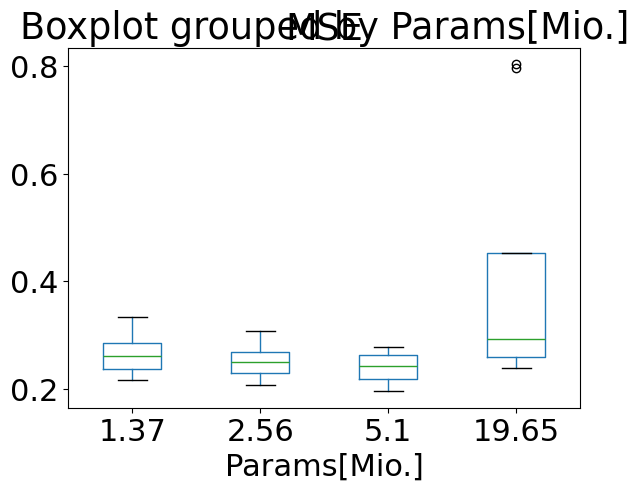

In [19]:
hpo_table.boxplot(by="Params[Mio.]", column="MSE", grid=False)

                       learning_rate  batch_size  d_layers  d_model  seq_len  \
e_layers Params[Mio.]                                                          
3        1.37                0.00055        64.0       1.0    256.0    336.0   
         5.10                0.00055        64.0       1.0    512.0    336.0   
         19.65               0.00055        64.0       1.0   1024.0    336.0   
6        2.56                0.00055        64.0       1.0    256.0    336.0   

                       pred_len  dropout  weight_decay       MSE       MAE  \
e_layers Params[Mio.]                                                        
3        1.37             192.0    0.125         0.055  0.266809  0.336803   
         5.10             192.0    0.125         0.055  0.239251  0.314202   
         19.65            192.0    0.125         0.055  0.409929  0.424919   
6        2.56             192.0    0.125         0.055  0.253907  0.325912   

                       Epochs  Time[min]  Max_mem[

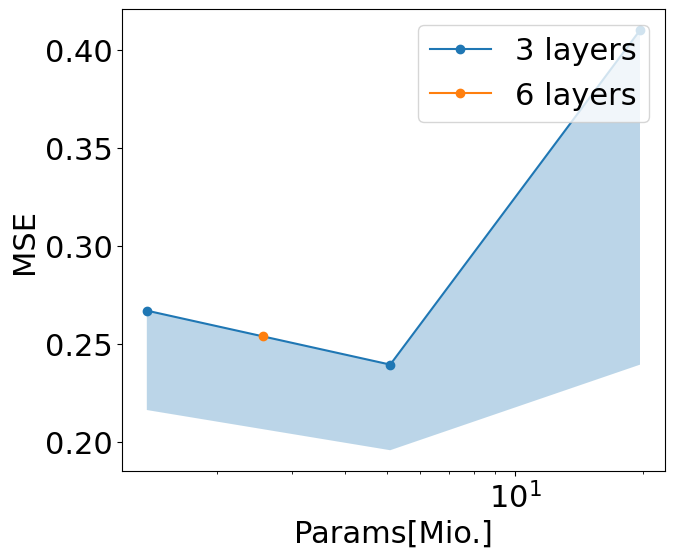

In [20]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

mc_table = hpo_table[hpo_table["seq_len"]==336].groupby(["e_layers", "Params[Mio.]"]).mean()
mc_min_table = hpo_table[hpo_table["seq_len"]==336].groupby(["e_layers", "Params[Mio.]"]).min()
print(mc_table)
#print(mc_table.xs(2, level="e_layers").index)

#Plot MSE over Params. Each e_layer has a different color
fig, ax = plt.subplots(1,1,figsize=(7, 6))
for i in [3,6]:
    ax.plot(mc_table.xs(i, level="e_layers").index, mc_table.xs(i, level="e_layers")["MSE"], label=f"{i} layers", marker="o")
    ax.fill_between(mc_table.xs(i, level="e_layers").index, mc_min_table.xs(i, level="e_layers")["MSE"], mc_table.xs(i, level="e_layers")["MSE"], alpha=0.3)

ax.set_xlabel("Params[Mio.]")
ax.set_ylabel("MSE")
ax.legend(loc="upper right")
ax.set_xscale("log")
# Move the x-axis to the top
#ax.xaxis.set_ticks_position('top')
#ax.xaxis.set_label_position('top')
plt.show()

In [21]:
hpo_table[hpo_table["MSE"]<0.08].groupby("e_layers").mean()

,learning_rate,batch_size,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
e_layers,,,,,,,,,,,,,,,,


In [22]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df.head(50)

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
21,0.0010,64,3,1,512,336,192,0.20,0.10,0.195554,0.281535,15,10,5.10,557.78,1,1
20,0.0010,64,3,1,512,336,192,0.05,0.01,0.199353,0.276314,15,11,5.10,557.78,1,1
29,0.0010,64,6,1,256,336,192,0.20,0.10,0.207603,0.285889,15,11,2.56,543.17,1,1
17,0.0010,64,3,1,256,336,192,0.20,0.10,0.216078,0.299659,15,9,1.37,305.17,1,1
23,0.0010,64,3,1,512,336,192,0.20,0.10,0.223980,0.306628,15,10,5.10,557.78,1,0
31,0.0010,64,6,1,256,336,192,0.20,0.10,0.229758,0.309098,15,11,2.56,543.17,1,0
28,0.0010,64,6,1,256,336,192,0.05,0.01,0.230335,0.296210,15,11,2.56,543.17,1,1
16,0.0010,64,3,1,256,336,192,0.05,0.01,0.231703,0.302287,15,10,1.37,305.17,1,1
22,0.0010,64,3,1,512,336,192,0.05,0.01,0.235823,0.307640,11,8,5.10,557.78,1,0
19,0.0010,64,3,1,256,336,192,0.20,0.10,0.239182,0.319992,15,9,1.37,305.17,1,0


In [23]:
average_model = sorted_df.iloc[0:10].describe().iloc[1:3]
best_model = sorted_df.iloc[0:3]
worst_model = sorted_df.iloc[-1:]

overview_models = pd.concat([average_model, worst_model, best_model], axis=0)

overview_models.rename(index={"mean":"Mean Top10", "std":"Std Top10"}, inplace=True)
overview_models.drop(columns=["MAE", "batch_size", "d_layers", "Time[min]", "Max_mem[MB]", "pred_len"], inplace=True)
overview_models.rename(columns={"learning_rate": "Lr", "e_layers": "Enc. layers", "d_model": "D. model", "seq_len": "Seq. len."}, inplace=True)
overview_models = overview_models.sort_index(axis=1)
overview_models = overview_models.round(6)
mse_column, lr_column, epoch_column = overview_models.pop("MSE"), overview_models.pop("Lr"), overview_models.pop("Epochs")
overview_models.insert(4, "Epochs", epoch_column)
overview_models= overview_models.round(2)

overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]] = overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]].astype(int)

overview_models.insert(0, "Lr", lr_column)
overview_models.insert(6, "MSE", mse_column)
overview_models

,Lr,D. model,Enc. layers,OneCycle,Params[Mio.],Epochs,MSE,Seq. len.,adamW,dropout,weight_decay
Mean Top10,0.001,358,3,0.60,3.22,14,0.220937,336,1.0,0.14,0.06
Std Top10,0.000,132,1,0.52,1.69,1,0.015483,0,0.0,0.08,0.05
25,0.001,1024,3,1.00,19.65,7,0.803158,336,1.0,0.20,0.10
21,0.001,512,3,1.00,5.10,15,0.195554,336,1.0,0.20,0.10
20,0.001,512,3,1.00,5.10,15,0.199353,336,1.0,0.05,0.01
29,0.001,256,6,1.00,2.56,15,0.207603,336,1.0,0.20,0.10


In [24]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.1955535858869552

## Params[Mio.] vs MSE

In [25]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
17,0.0010,64,3,1,256,336,192,0.20,0.10,0.216078,0.299659,15,9,1.37,305.17,1,1
16,0.0010,64,3,1,256,336,192,0.05,0.01,0.231703,0.302287,15,10,1.37,305.17,1,1
19,0.0010,64,3,1,256,336,192,0.20,0.10,0.239182,0.319992,15,9,1.37,305.17,1,0
18,0.0010,64,3,1,256,336,192,0.05,0.01,0.251576,0.321606,13,8,1.37,305.17,1,0
1,0.0001,64,3,1,256,336,192,0.20,0.10,0.269559,0.340934,15,9,1.37,305.17,1,1
0,0.0001,64,3,1,256,336,192,0.05,0.01,0.275297,0.339453,15,10,1.37,305.17,1,1
2,0.0001,64,3,1,256,336,192,0.05,0.01,0.317755,0.379028,15,9,1.37,305.17,1,0
3,0.0001,64,3,1,256,336,192,0.20,0.10,0.333317,0.391464,15,9,1.37,305.17,1,0
29,0.0010,64,6,1,256,336,192,0.20,0.10,0.207603,0.285889,15,11,2.56,543.17,1,1
31,0.0010,64,6,1,256,336,192,0.20,0.10,0.229758,0.309098,15,11,2.56,543.17,1,0


In [26]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model", "dropout", "weight_decay", "OneCycle"]]
print(reduced_hpo_table.shape)

(32, 10)


In [27]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(15, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    ynames = column_names if ynames is None else ynames
        
    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    # Normalize data
    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter for better visibility
    jitter_strength = 0.00005 
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, 0] = np.random.normal(0, 0.00005, zs[:, 0].shape)
    jitter[:, -1] = 0  # Don't jitter the last column
    zs += jitter
    #zs[:, -2][zs[:, -2] < 0] = 0 # Avoid negative values

    # Create the parallel coordinates
    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
        ax.tick_params(axis='y', labelsize=22)
        ax.tick_params(axis='x', length=0)
            #ax.set_yscale('log')
        
    #axes[-3].set_yscale('log')
    

    host.set_xlim(0, ys.shape[1] - 1) 
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=22)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    #host.set_title('Parallel Coordinate Plot Transformer pred_len 24', fontsize=22)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    sm = ScalarMappable(norm=color_norm, cmap=cmap)
    sm.set_array([])

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)
    
    # Bring MSE axis to front (before color bar)
    axes[-1].set_zorder(10) 
    
    # Color bar
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="20%", pad=0.0)
    cbar = plt.colorbar(sm, cax=cax)
    cbar.ax.yaxis.set_ticks([])
  
    plt.tight_layout()
    plt.show()


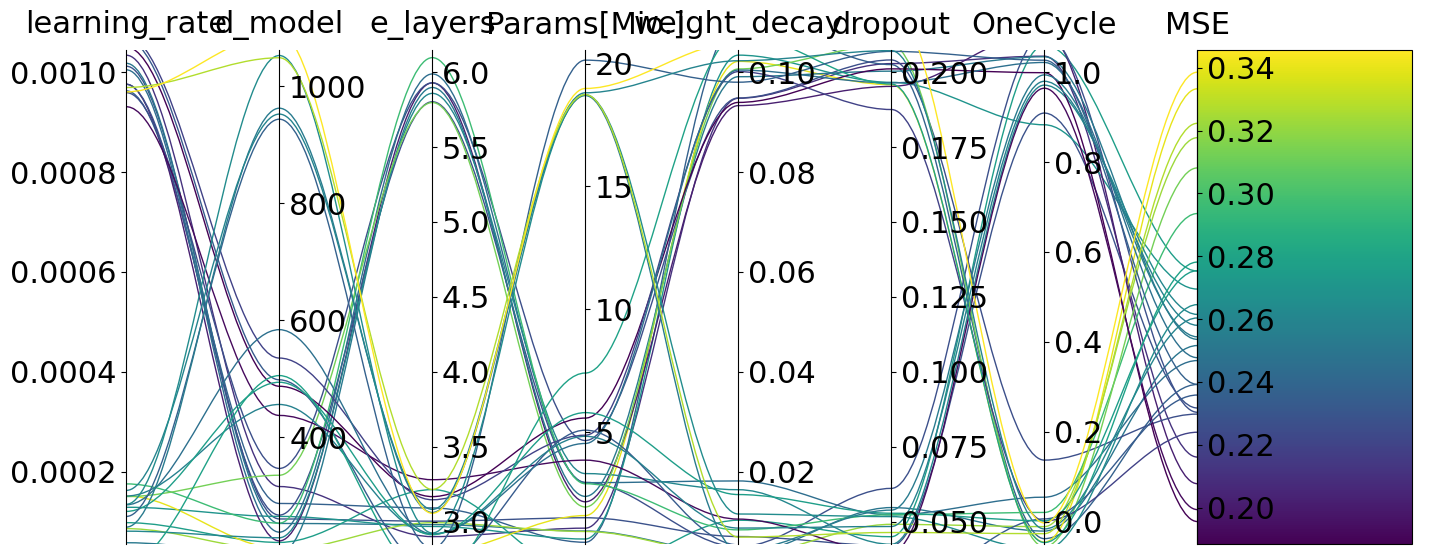

In [28]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "weight_decay", "dropout", "OneCycle", "MSE"], threshold=0.35)

ValueError: zero-size array to reduction operation minimum which has no identity

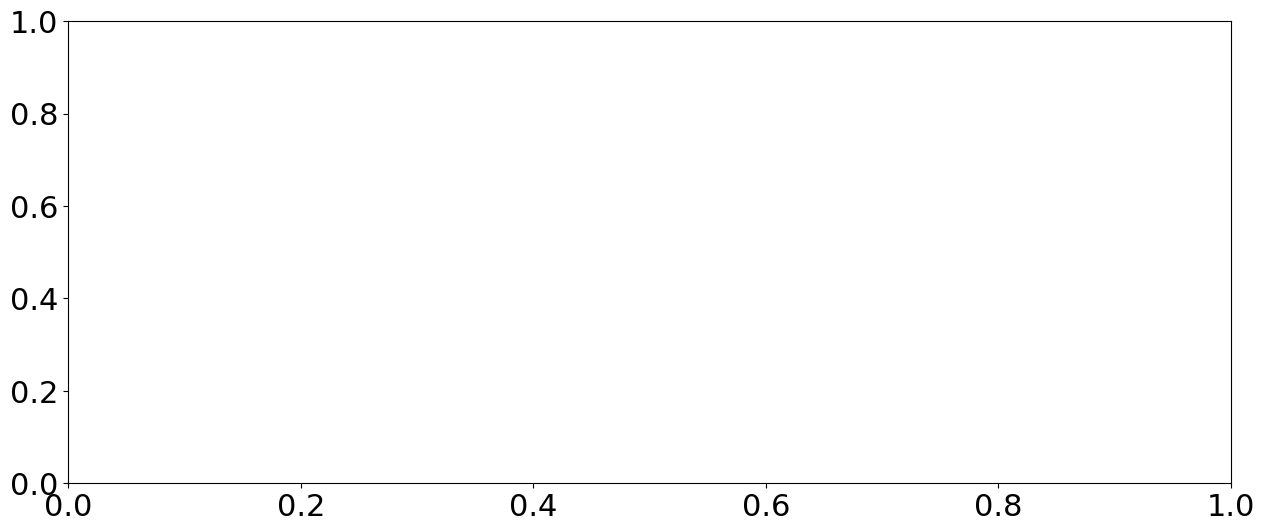

In [29]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.08)
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.075)

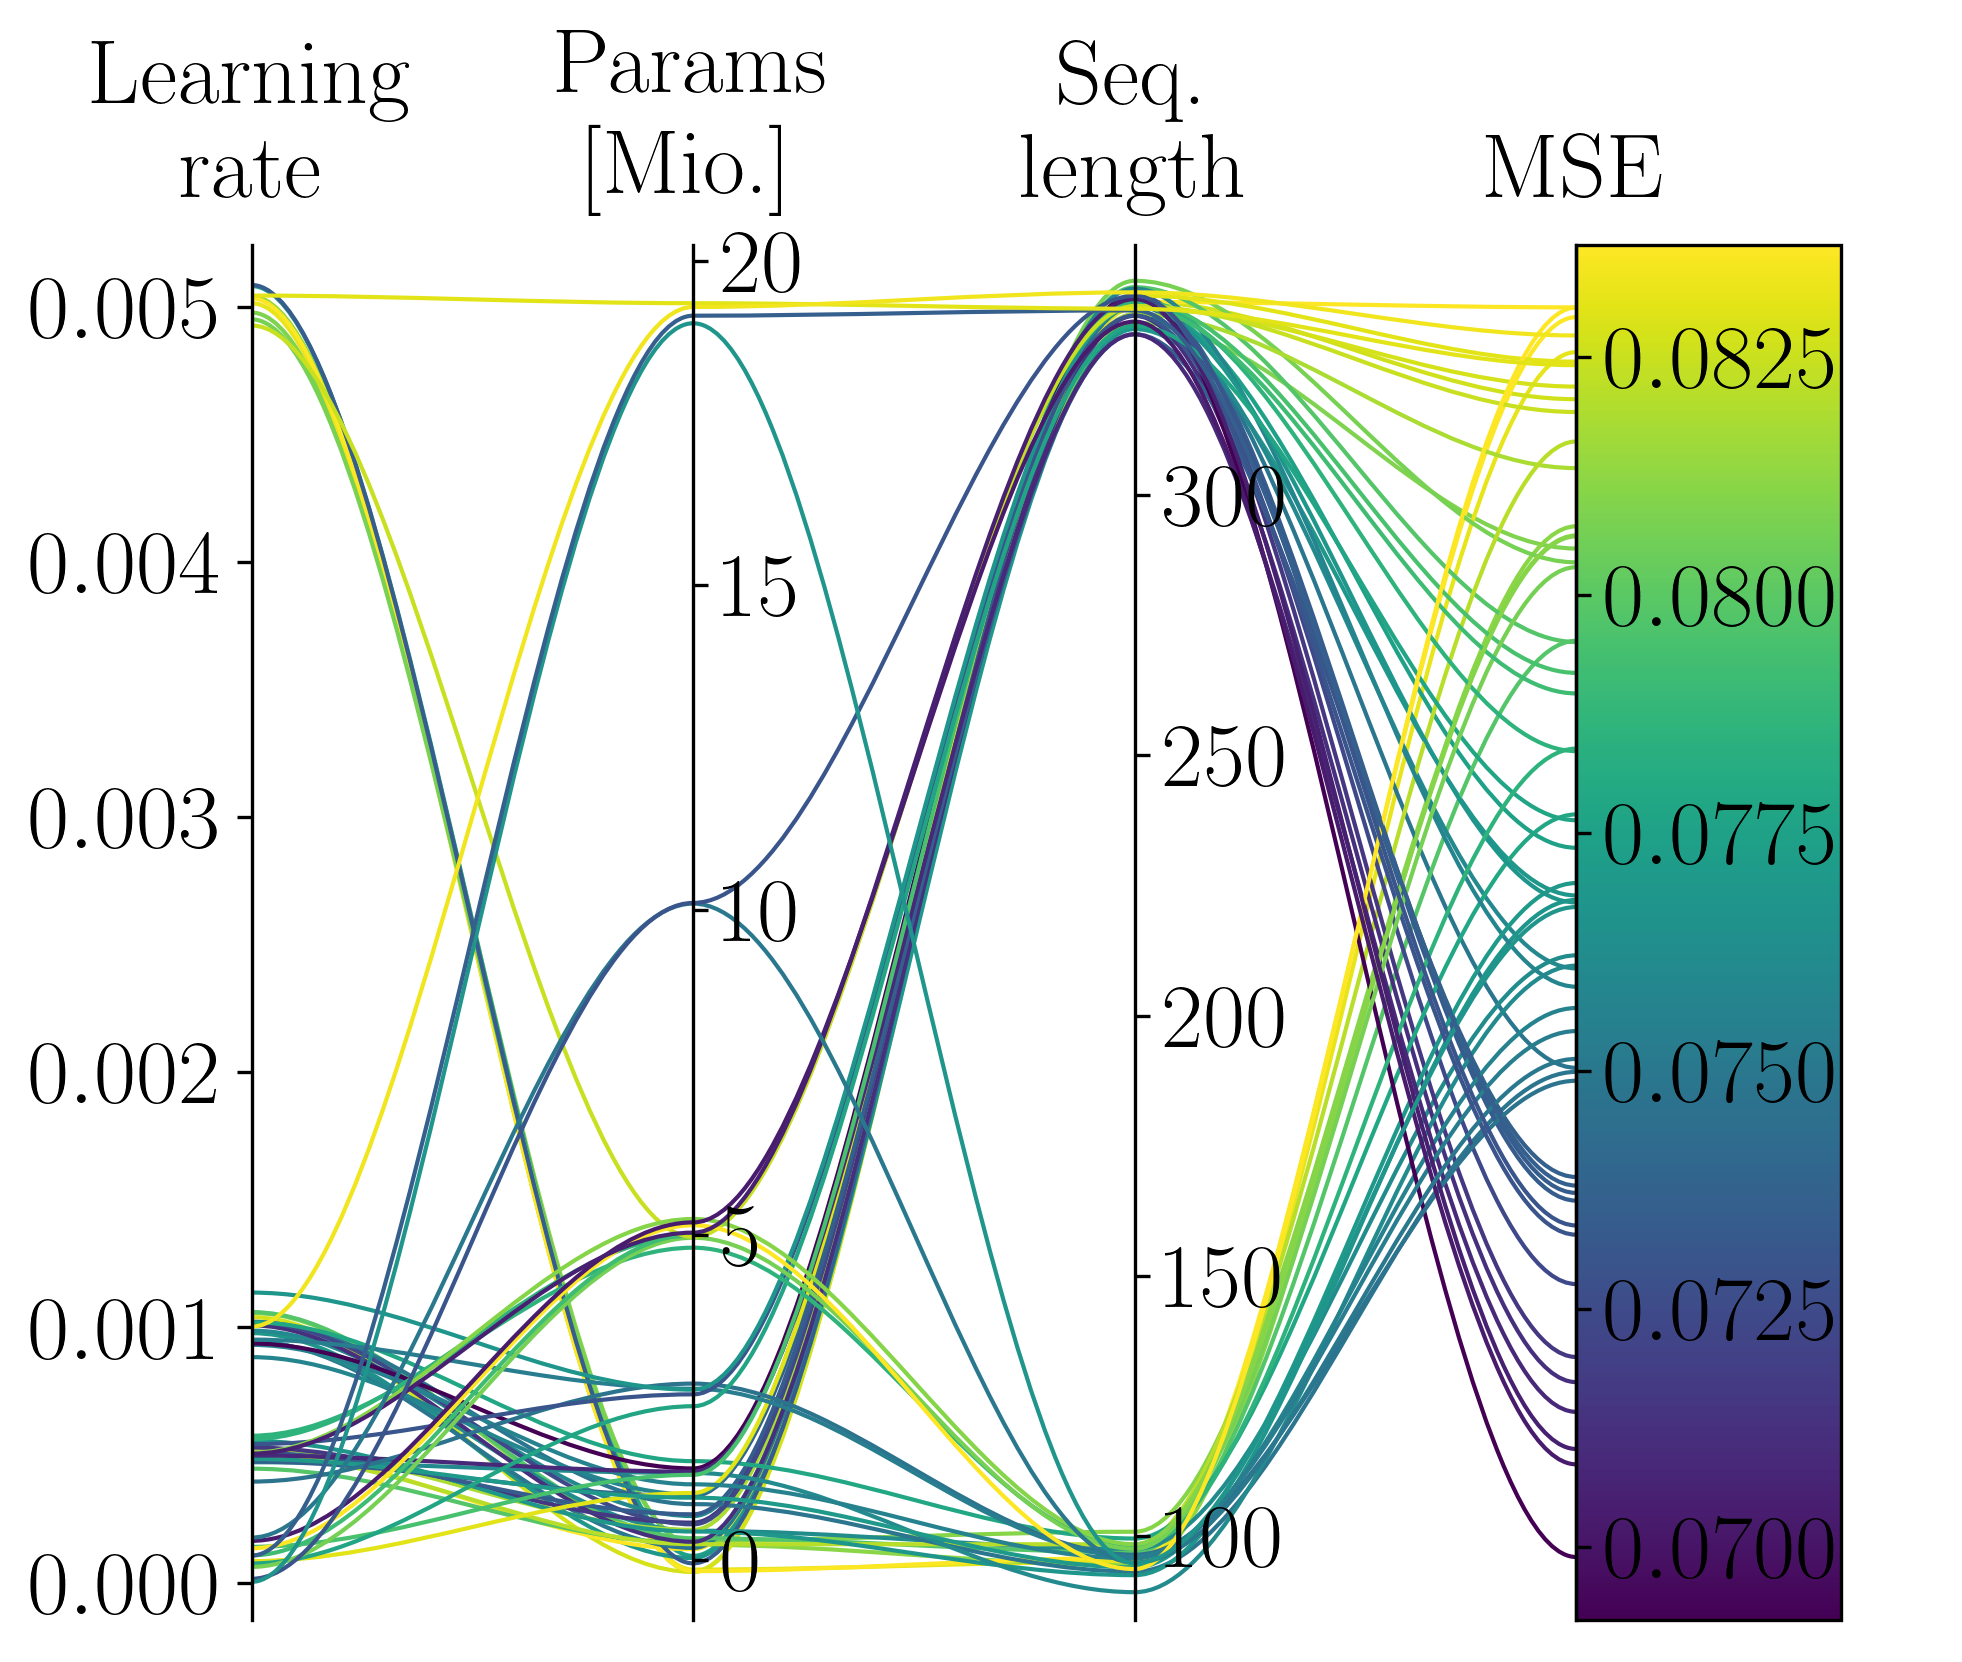

In [ ]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "Params[Mio.]", "seq_len", "MSE"], threshold=best_mse * 1.2, ynames=["Learning \n rate", "Params \n [Mio.]", "Seq. \n length", "MSE"])